In [1]:
from cobaya.model import get_model
#import numpy as np
#import matplotlib.pyplot as plt
import conftest 

In [2]:
info = conftest.evaluate_one_info.__wrapped__()

In [3]:
info["params"] = conftest.test_cosmology_params.__wrapped__()
info["theory"] = {
        "camb": {"stop_at_error": True},
        "soliket.halo_model_fe.HaloModel_fe": {"stop_at_error": True},
    }
info["likelihood"] = {
            "one": {
                "requires": {
                    "Pk_grid": {
                        "z": 0.0,
                        "k_max": 10.0,
                        "nonlinear": False,
                        "var_pairs": ("delta_tot", "delta_tot"),
                    },
                    "Pk_mm_grid": {},
                }
            }
        }

In [4]:
model = get_model(info) 

 2025-03-19 15:48:35,467 [input] 'soliket.halo_model_fe.HaloModel_fe' could not be found as internal, trying external.
 2025-03-19 15:48:35,836 [model] *WARNING* Ignored blocks/options: ['sampler']
 2025-03-19 15:48:35,838 [model] Input info updated with defaults (dumped to YAML):
theory:
  camb:
    version: null
    path: null
    speed: 0.3
    stop_at_error: true
    extra_args: null
    ignore_obsolete: false
    use_renames: false
    external_primordial_pk: false
    renames:
      omegabh2: ombh2
      omegach2: omch2
      omegal: omega_de
      omegak: omk
      yhe: YHe
      yheused: YHe
      YpBBN: Y_p
  soliket.halo_model_fe.HaloModel_fe:
    read_matterPS: false
    gal_mod: false
    matter_matter: mm
    galaxy_galaxy: null
    matter_galaxy: null
    redshift: ./tabulated/redshift.txt
    z:
    - 0
    - 1
    - 2
    kmax: 10.0
    Mmin: 11
    Mmax: 15
    nm: 200
    Dc: 200
    T_CMB: 2.725
    tau: 0.0544
    ns: 0.9649
    As: 1.97448e-09
    pivot_scalar: 0.0

In [5]:
sampled_params = model.prior.sample() 

In [6]:
logp = model.logposterior(sampled_params)

 2025-03-19 15:48:38,622 [model] Posterior to be computed for parameters {}
 2025-03-19 15:48:38,624 [prior] Evaluating prior at array([], dtype=float64)
 2025-03-19 15:48:38,625 [prior] Got logpriors (internal) = 0.0
 2025-03-19 15:48:38,625 [model] Got input parameters: {'As': 2.15086031154146e-09, 'ns': 0.9625356, 'ombh2': 0.02219218, 'omch2': 0.1203058, 'H0': 67.02393, 'tau': 0.06574325, 'nnu': 3.04, 'mnu': 0.06}
 2025-03-19 15:48:38,626 [camb.transfers] Got parameters {'ombh2': 0.02219218, 'omch2': 0.1203058, 'H0': 67.02393, 'tau': 0.06574325, 'nnu': 3.04, 'mnu': 0.06}
 2025-03-19 15:48:38,626 [camb.transfers] Computing new state
 2025-03-19 15:48:38,626 [camb] Setting parameters: {'ombh2': 0.02219218, 'omch2': 0.1203058, 'H0': 67.02393, 'tau': 0.06574325, 'nnu': 3.04, 'mnu': 0.06} and {'kmax': 10.0, 'redshifts': array([1.10000000e+03, 1.00195087e+03, 9.12641400e+02, 8.31292584e+02,
       7.57194842e+02, 6.89701844e+02, 6.28224873e+02, 5.72227688e+02,
       5.21221844e+02, 4.747

In [7]:
lhood = model.likelihood["one"]


In [8]:
pk_mm = lhood.provider.get_Pk_mm_grid()

In [9]:
k, z, Pk_mm_lin = lhood.provider.get_Pk_grid(var_pair=("delta_tot", "delta_tot"), nonlinear=False)

In [10]:
import matplotlib.pyplot as plt

 2025-03-19 15:48:44,417 [matplotlib] matplotlib data path: /home/giorgia/anaconda3/envs/soliket_env/lib/python3.11/site-packages/matplotlib/mpl-data
 2025-03-19 15:48:44,422 [matplotlib] CONFIGDIR=/home/giorgia/.config/matplotlib
 2025-03-19 15:48:44,428 [matplotlib] interactive is False
 2025-03-19 15:48:44,429 [matplotlib] platform is linux
 2025-03-19 15:48:44,456 [matplotlib] CACHEDIR=/home/giorgia/.cache/matplotlib
 2025-03-19 15:48:44,460 [matplotlib.font_manager] Using fontManager instance from /home/giorgia/.cache/matplotlib/fontlist-v390.json


 2025-03-19 15:49:04,894 [matplotlib.pyplot] Loaded backend module://matplotlib_inline.backend_inline version unknown.
 2025-03-19 15:49:04,896 [matplotlib.pyplot] Loaded backend module://matplotlib_inline.backend_inline version unknown.
 2025-03-19 15:49:04,898 [matplotlib.font_manager] findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
 2025-03-19 15:49:04,898 [matplotlib.font_manager] findfont: score(FontEntry(fname='/home/giorgia/anaconda3/envs/soliket_env/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Oblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
 2025-03-19 15:49:04,899 [matplotlib.font_manager] findfont: score(FontEntry(fname='/home/giorgia/anaconda3/envs/soliket_env/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf', name='STIXGeneral', style='italic', variant='normal', weight=700, stretch='

 2025-03-19 15:49:05,195 [matplotlib.ticker] vmin 2.7093120317179417e-05 vmax 19.377612003953466
 2025-03-19 15:49:05,196 [matplotlib.ticker] ticklocs array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03])
 2025-03-19 15:49:05,203 [matplotlib.ticker] vmin 2.7093120317179417e-05 vmax 19.377612003953466
 2025-03-19 15:49:05,204 [matplotlib.ticker] ticklocs array([2.e-06, 3.e-06, 4.e-06, 5.e-06, 6.e-06, 7.e-06, 8.e-06, 9.e-06,
       2.e-05, 3.e-05, 4.e-05, 5.e-05, 6.e-05, 7.e-05, 8.e-05, 9.e-05,
       2.e-04, 3.e-04, 4.e-04, 5.e-04, 6.e-04, 7.e-04, 8.e-04, 9.e-04,
       2.e-03, 3.e-03, 4.e-03, 5.e-03, 6.e-03, 7.e-03, 8.e-03, 9.e-03,
       2.e-02, 3.e-02, 4.e-02, 5.e-02, 6.e-02, 7.e-02, 8.e-02, 9.e-02,
       2.e-01, 3.e-01, 4.e-01, 5.e-01, 6.e-01, 7.e-01, 8.e-01, 9.e-01,
       2.e+00, 3.e+00, 4.e+00, 5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00,
       2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01,
       2.e+02, 3.e+02, 4.e+02, 5.e+

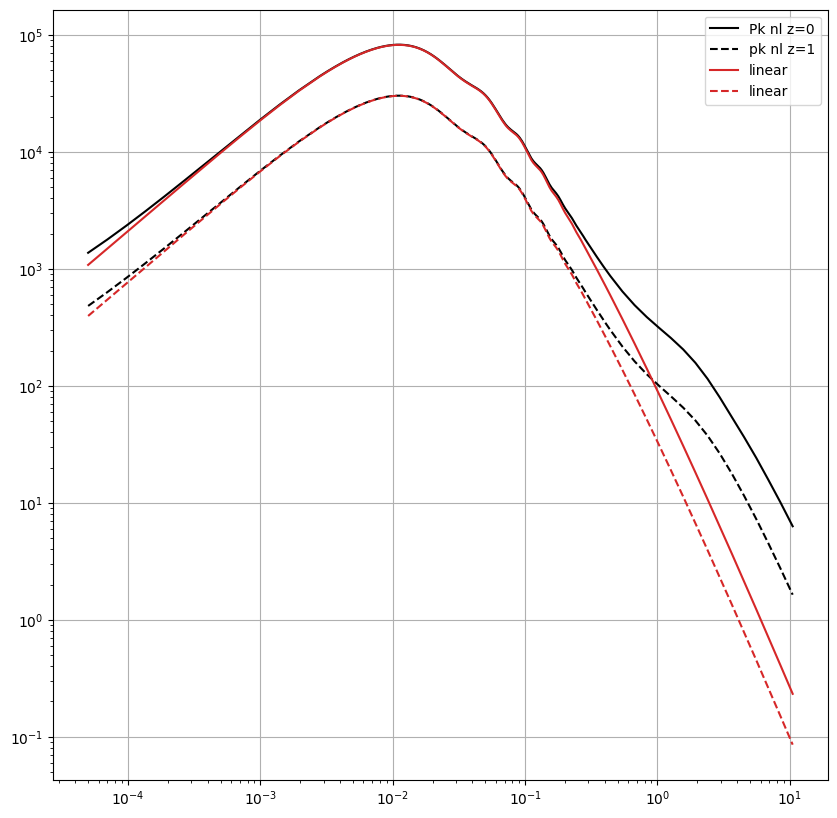

In [11]:
plt.figure(figsize=(10,10))
plt.plot(k, pk_mm[0,:], color='black', label='Pk nl z=0')
plt.plot(k, pk_mm[75,:], color='black', ls='dashed', label='pk nl z=1')
plt.plot(k, Pk_mm_lin[0,:], color='tab:red', label='linear')
plt.plot(k, Pk_mm_lin[75,:], color='tab:red', ls='dashed', label='linear')
plt.loglog()
plt.grid()
plt.legend()